In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("hw6.ipynb")

ValueError: Tests directory ./tests does not exist

# CPSC 330 - Applied Machine Learning

## Homework 6: Clustering
### Associated lectures: Lectures 14 and 15

**Due date: Check the [Calendar](https://htmlpreview.github.io/?https://github.com/UBC-CS/cpsc330/blob/master/docs/calendar.html)**

## Imports <a name="im"></a>

In [2]:
import os
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline
pd.set_option("display.max_colwidth", 0)

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
## Instructions
rubric={points}

You will earn points for following these instructions and successfully submitting your work on Gradescope.  

### Group wotk instructions

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2.
  
- Use group work as an opportunity to collaborate and learn new things from each other.
- Be respectful to each other and make sure you understand all the concepts in the assignment well.
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline.
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


### General submission instructions

- Please **read carefully
[Use of Generative AI policy](https://ubc-cs.github.io/cpsc330-2025W1/syllabus.html#use-of-generative-ai-in-the-course)** before starting the homework assignment.
- **Run all cells before submitting:** Go to `Kernel -> Restart Kernel and Clear All Outputs`, then select `Run -> Run All Cells`. This ensures your notebook runs cleanly from start to finish without errors.
  
- **Submit your files on Gradescope.**  
   - Upload only your `.ipynb` file **with outputs displayed** and any required output files.
     
   - Do **not** submit other files from your repository.  
   - If you need help, see the [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/).  
- **Check that outputs render properly.**  
   - Make sure all plots and outputs appear in your submission.
     
   - If your `.ipynb` file is too large and doesn't render on Gradescope, also upload a PDF or HTML version so the TAs can view your work.  
- **Keep execution order clean.**  
   - Execution numbers must start at "1" and increase in order.
     
   - Notebooks without visible outputs may not be graded.  
   - Out-of-order or missing execution numbers may result in mark deductions.  
- **Follow course submission guidelines:** Review the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html) for detailed guidance on completing and submitting assignments.
   
</div>

_Points:_ 4

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 1: Document clustering warm-up
<hr>

In this homework, we will explore a popular application of clustering called [**document clustering**](https://en.wikipedia.org/wiki/Document_clustering). A large amount of unlabeled text data is available out there (e.g., news, recipes, online Q&A, tweets), and clustering is a commonly used technique to organize this data in a meaningful way.

As a warm up, in this exercise you will cluster sentences from a toy corpus. Later in the homework you will work with a real corpus.

The code below extracts introductory sentences of Wikipedia articles on a set of queries. To run the code successfully, you will need the `wikipedia` package installed in the course environment.

```
conda activate cpsc330
conda install -c conda-forge wikipedia
```


**Your tasks:**

Run the code below which
- extracts content of Wikipedia articles on a set of queries
- tokenizes the text (i.e., separates sentences) and
- stores the 2nd sentence in each article as a document representing that article

> Feel free to experiment with Wikipedia queries of your choice. But stick to the provided list for the final submission so that it's easier for the TAs to grade your submission.

> For tokenization we are using the `nltk` package. If you do not have this package in the course environment, you will have to install it.

```
conda activate cpsc330
conda install -c anaconda nltk
```

Even if you have the package installed via the course `conda` environment, you might have to download `nltk` pre-trained models, which can be done with the code below.

In [3]:
import nltk

nltk.download("punkt")
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [4]:
import wikipedia
import string
from nltk.tokenize import sent_tokenize, word_tokenize

queries = [
    "Artificial Intelligence",
    "Deep learning",
    "Unsupervised learning",
    "Quantum Computing",
    "Environmental protection",
    "Climate Change",
    "Renewable Energy",
    "Biodiversity",
    "French Cuisine",
    "Bread food",
    "Dumpling food",
]
wiki_dict = {"wiki query": [], "text": [], "n_words": []}
remove_tokens = list(string.punctuation) + ['``', '’', '`', 'br', '"', "”", "''", "'s", "(", ")", "[", "]"]

# Running this code might take some time.
for query in queries:
    try:
        # Attempt to fetch the page content
        page_content = wikipedia.page(query).content
    except wikipedia.exceptions.PageError:
        print(f"Page not found for query: {query}. Skipping...")
        continue
    except wikipedia.exceptions.DisambiguationError as e:
        print(f"Query: {query} led to a disambiguation page. Choosing the first option: {e.options[0]}")
        page_content = wikipedia.page(e.options[0]).content

    text = sent_tokenize(page_content)[0]
    tokenized = word_tokenize(text)
    text_pp = [token.lower() for token in tokenized if token.lower() not in remove_tokens]
    wiki_dict["n_words"].append(len(text_pp))
    wiki_dict["text"].append(" ".join(text_pp))
    wiki_dict["wiki query"].append(query)

wiki_df = pd.DataFrame(wiki_dict)
wiki_df

,wiki query,text,n_words
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20
7,Biodiversity,biodiversity is the variability of life on earth,8
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10
9,Bread food,bread is a baked food product made from water flour and often yeast,13


Our toy corpus has six toy documents (`text` column in the dataframe) extracted from Wikipedia queries.

<br><br>

<!-- BEGIN QUESTION -->

### 1.1 How many clusters?
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

- If tasked with manually clustering documents from this toy corpus, how many clusters would you identify, and what labels would you assign to each cluster?
</div>

<div class="alert alert-warning">

Solution_1.1
    
</div>

_Points:_ 1

I've identified 3 clusters:
1) Technology (consisting of AI, DL, Unsupervised Learning, Quantum Computing),
2) Environment (climate change, renewable energy, biodiversity, environmental protection),
3) Food (including French cuisine, bread, and dumplings).

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.2 K-Means with bag-of-words representation
rubric={accuracy}

In the lecture, we explored how **data representation significantly impacts clustering quality**. We saw that replacing a **flattened image representation** with feature vectors extracted from **pre-trained models** greatly improved clustering results.  

What about text data? In previous machine learning courses, we have used the **bag-of-words (BoW) representation** to numerically encode text, where each document is represented with a vector of word frequencies.

In this exercise, you will **cluster documents** using this **simplistic text representation**.  

<div class="alert alert-info">

**Your tasks:**

1. Use [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) with its **default settings** to transform the `text` column in `wiki_df` into a numerical representation.  

2. Use [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) to cluster the encoded documents and store the cluster labels in `kmeans_bow_labels`.  
   - Set `random_state=42` for **reproducibility**.
     
   - Use the **number of clusters** (`n_clusters`) identified in the **previous exercise**.  
</div>

<div class="alert alert-warning">

Solution_1.2
    
</div>

_Points:_ 2

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

vectorizer = CountVectorizer()
bow_sents = vectorizer.fit_transform(wiki_df["text"])

In [6]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bow_sents)

kmeans_bow_labels = kmeans.labels_

In [7]:
wiki_df["bow_kmeans"] = [kmeans_bow_labels[label] for label in kmeans.labels_]
wiki_df

,wiki query,text,n_words,bow_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,2
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,2
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,2
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,2
7,Biodiversity,biodiversity is the variability of life on earth,8,2
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,2
9,Bread food,bread is a baked food product made from water flour and often yeast,13,2


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.3 K-Means with sentence embedding representation
rubric={accuracy}

In the previous exercise, you may have noticed that clustering results were suboptimal. While the bag-of-words (BoW) representation is useful, it has significant limitations. It does not capture word order or context effectively.  

To improve text representation, we can use pre-trained models, similar to those used for image data, to extract richer, context-aware embeddings through transfer learning. In this lab, we will use the **pre-trained model** `'all-MiniLM-L6-v2'`, available via the [Sentence Transformers](https://www.sbert.net/index.html) package.  

This deep learning model generates **dense, fixed-length vector representations** of sentences, capturing **semantic meaning and contextual information**. These representations are particularly effective for **clustering and semantic similarity tasks**. If you're interested in exploring more **pre-trained models**, refer to the [full list here](https://www.sbert.net/docs/pretrained_models.html). We will explore these representations further in **DSCI 575**.  

<div class="alert alert-info">

**Your tasks:**

1. Run the code below to create sentence embedding representation of documents in our toy corpus.
   
3. Apply `KMeans` to the **sentence embeddings** (`emb_sents`) and store the cluster labels in `kmeans_emb_labels`. Use the following parameters:  
    - `random_state=42` (for reproducibility)
      
    - `n_clusters`=the number of clusters you identified in 1.1

Note
- The code below might throw a warning. You may ignore it for the purpose of this lab.
</div>

In [8]:
from sentence_transformers import SentenceTransformer

embedder = SentenceTransformer("all-MiniLM-L6-v2")

/usr/local/lib/python3.12/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [9]:
emb_sents = embedder.encode(wiki_df["text"].tolist())
emb_sent_df = pd.DataFrame(emb_sents, index=wiki_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
0,-0.005857,-0.004795,-0.000976,0.011121,0.005294,-0.061630,0.062072,0.033673,-0.035251,0.074072,...,0.088312,-0.006600,0.036511,-0.020797,-0.002082,0.058263,0.061881,0.097383,0.058155,-0.052016
1,-0.124845,-0.084891,0.082492,0.017458,0.022980,0.056852,-0.060654,-0.060344,-0.020284,-0.070915,...,0.082265,0.009324,-0.005930,-0.130974,0.002398,0.052424,-0.008989,0.015588,-0.017662,-0.018494
2,-0.056721,-0.049697,-0.014780,0.022572,0.051773,0.007456,0.008632,-0.074847,-0.065573,-0.027284,...,0.014761,-0.022392,0.021360,-0.107016,0.020530,0.045678,0.052755,0.005429,0.022018,-0.010994
3,-0.072006,0.006120,-0.085242,0.051515,-0.119036,0.015745,-0.006809,-0.064673,0.004276,0.018435,...,-0.067665,0.031661,-0.017610,-0.072480,-0.008318,0.127195,0.033353,0.084555,0.015101,0.020704
4,-0.012700,0.101830,0.066676,-0.007987,0.140040,0.041627,0.035495,-0.050723,-0.037633,0.055886,...,-0.042105,-0.038883,0.018268,0.009920,0.028208,0.052759,-0.009605,-0.004518,0.060853,0.057709
5,-0.014444,0.022869,0.145982,0.054865,0.085204,-0.014689,-0.102757,0.016853,-0.023799,0.021148,...,0.011778,0.016817,-0.020041,0.006375,0.055428,0.076868,-0.047152,-0.114797,-0.056382,0.022349
6,-0.044869,0.076882,-0.012749,0.033335,0.067894,-0.002326,0.031620,-0.021576,0.046619,0.005089,...,-0.021575,-0.017596,-0.069995,0.004461,-0.040409,-0.043067,0.044042,-0.050977,0.056506,0.048708
7,0.027806,0.077117,0.015402,-0.013544,0.043216,0.048124,0.027763,-0.022999,0.049303,0.009686,...,0.014946,-0.020896,0.022283,-0.012311,0.014079,0.028085,0.025272,-0.015233,-0.014879,-0.064280
8,0.026616,-0.019929,-0.008049,-0.025907,-0.055372,0.011235,-0.024538,-0.065724,0.058374,-0.062895,...,-0.059513,0.077446,-0.059827,-0.021454,0.088102,-0.127180,-0.031399,0.120572,0.072373,-0.058336
9,-0.014786,0.055887,-0.020880,0.005313,-0.025037,0.040479,0.035260,0.024938,0.017546,0.072433,...,-0.082098,0.037856,-0.020007,-0.087252,0.058164,-0.044187,-0.030253,-0.080385,0.075614,-0.070403


<div class="alert alert-warning">

Solution_1.3
    
</div>

_Points:_ 2

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(emb_sents)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [11]:
kmeans_emb_labels = ['Technology', 'Environment', 'Food']

In [12]:
wiki_df["emb_kmeans"] = [kmeans_emb_labels[label] for label in kmeans.labels_]
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,2,Food
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,Food
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,Food
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,2,Food
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,1,Technology
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,2,Technology
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,2,Technology
7,Biodiversity,biodiversity is the variability of life on earth,8,2,Technology
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,2,Environment
9,Bread food,bread is a baked food product made from water flour and often yeast,13,2,Environment


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.4 DBSCAN with sentence embedding representation and cosine distance  
rubric={accuracy}

Now, let's apply [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html) to our toy dataset.  

Unlike K-Means, which relies on Euclidean distance due to its use of centroids, DBSCAN allows us to experiment with different distance metrics. For text data, [**cosine similarity**](https://scikit-learn.org/stable/modules/metrics.html#cosine-similarity) (or its complement, **cosine distance**) is often more effective than Euclidean distance.  

The **cosine distance** between two vectors $u$ and $v$ is defined as:

$$distance_{cosine}(u,v) = 1 - (\frac{u \cdot v}{\left\lVert u\right\rVert_2 \left\lVert v\right\rVert_2})$$

<div class="alert alert-info">

**Your tasks:**

- Apply **DBSCAN** to cluster documents encoded with **sentence embeddings** (`emb_sents`) and store the cluster labels in `dbscan_emb_labels`.
    
- Set `metric='cosine'` to use **cosine distance** for clustering.
- Tune the **hyperparameters** `eps` and `min_samples` to obtain meaningful clusters, as the default values are unlikely to work well on this dataset.  

**Notes for tuning the hyperparameters:**

- Start by examining the minimum, maximum, and mean cosine distances in the dataset. You can compute pairwise cosine distances using the package imported below.
  
- Experiment with a range of `eps` values and print the number of clusters and their sizes for each value.
- Select the `eps` value that produces the desired number of clusters.


</div>

In [13]:
from sklearn.metrics.pairwise import cosine_distances

<div class="alert alert-warning">

Solution_1.4
    
</div>

_Points:_ 4

In [14]:
from sklearn.cluster import DBSCAN

cosine_distance = cosine_distances(emb_sents)

In [15]:
dbscan = DBSCAN(eps=0.35, min_samples=2, metric='cosine')
dbscan.fit(emb_sents)

,eps,0.35
,min_samples,2
,metric,'cosine'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,None


In [16]:
dbscan_emb_labels = dbscan.labels_

In [17]:
wiki_df["emb_dbscan"] = dbscan_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,2,Food,-1
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,Food,-1
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,Food,-1
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,2,Food,-1
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,1,Technology,-1
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,2,Technology,-1
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,2,Technology,-1
7,Biodiversity,biodiversity is the variability of life on earth,8,2,Technology,-1
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,2,Environment,-1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,2,Environment,-1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.5 Hierarchical clustering with sentence embedding representation
rubric={accuracy}

<div class="alert alert-info">

**Your tasks:**

Apply hierarchical clustering on `emb_sents`. In particular
1. Create and show a dendrogram with `complete` linkage and `metric='cosine'` on this toy dataset.

3. Create flat clusters using `fcluster` with appropriate hyperparameters and store cluster labels to `hier_emb_labels` variable below.

</div>

<div class="alert alert-warning">

Solution_1.5
    
</div>

_Points:_ 3

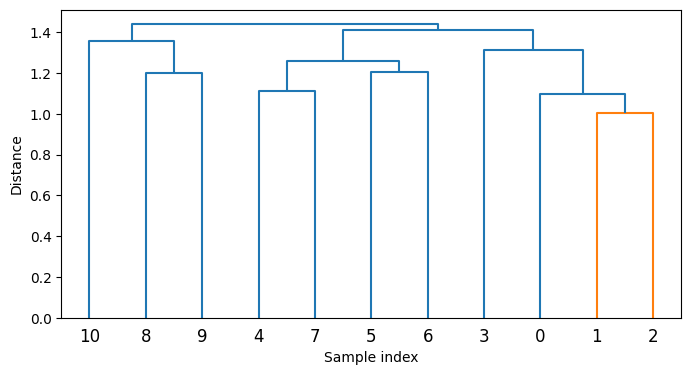

In [18]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

linkage_array = linkage(pdist(emb_sents), metric="cosine", method="complete")

plt.figure(figsize=(8,4))
dendrogram(linkage_array)
plt.xlabel("Sample index")
plt.ylabel("Distance")
plt.show()

In [19]:
hier_emb_labels = fcluster(linkage_array, 3, criterion="maxclust")

In [20]:
wiki_df["emb_hierarchical"] = hier_emb_labels
wiki_df

,wiki query,text,n_words,bow_kmeans,emb_kmeans,emb_dbscan,emb_hierarchical
0,Artificial Intelligence,artificial intelligence ai is the capability of computational systems to perform tasks typically associated with human intelligence such as learning reasoning problem-solving perception and decision-making,25,2,Food,-1,3
1,Deep learning,in machine learning deep learning focuses on utilizing multilayered neural networks to perform tasks such as classification regression and representation learning,21,2,Food,-1,3
2,Unsupervised learning,in machine learning supervised learning sl is a type of machine learning paradigm where an algorithm learns to map input data to a specific output based on example input-output pairs,30,2,Food,-1,3
3,Quantum Computing,a quantum computer is a real or theoretical computer that uses quantum mechanical phenomena in an essential way it exploits superposed and entangled states and the intrinsically non-deterministic outcomes of quantum measurements as features of its computation,37,2,Food,-1,3
4,Environmental protection,environmental protection or environment protection refers to the taking of measures to protecting the natural environment prevent pollution and maintain ecological balance,22,1,Technology,-1,2
5,Climate Change,present-day climate change includes both global warming—the ongoing increase in global average temperature—and its wider effects on earth climate system,20,2,Technology,-1,2
6,Renewable Energy,renewable energy also called green energy is energy made from renewable natural resources that are replenished on a human timescale,20,2,Technology,-1,2
7,Biodiversity,biodiversity is the variability of life on earth,8,2,Technology,-1,2
8,French Cuisine,french cuisine is the cooking traditions and practices of france,10,2,Environment,-1,1
9,Bread food,bread is a baked food product made from water flour and often yeast,13,2,Environment,-1,1


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.6 Discussion
rubric={reasoning}

<div class="alert alert-info">

**Your tasks:**

Reflect on and discuss the clustering results of the methods you explored in the previous exercises, focusing on the following points:    
- effect of input representation on clustering results

- whether the clustering results match with your intuitions and the challenges associated with getting the desired clustering results with each method

</div>

<div class="alert alert-warning">

Solution_1.6
    
</div>

_Points:_ 4

There was a clear effect on the clustering results from the input representation. When I used features from bag-of-words, the clusters grouped together sentences with similar vocabulary even when their meanings were different. Using embeddings was able to take into account the semantics, so topics like AI, DL, and Quantum Computing ended up in the same cluster – technology!  

The clustering mostly matched my intuition. The technology sentences were grouped together, the food sentences grouped together, and the environmental topics like Climate Change and Renewable Energy were clustered separately. The challenge was choosing the right and best hyperparameters – for example, optimizing eps and min_samples in DBSCAN or picking the number of clusters in K-Means. Parameter changes showed how sensitive unsupervised methods can be to hyperparameter optimization and representations.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

### 1.7 Visualizing clusters
rubric={points:4}


One approach to working with unlabeled data is visualization. That said, our data is high-dimensional, making it challenging to visualize. Take sentence embedding representation as an example: each instance is depicted in 768 dimensions. To visualize such high-dimensional data, we can employ dimensionality reduction techniques to extract the most significant 2 or 3 components, and then visualize this low-dimensional data.

Given data as a `numpy` array and corresponding cluster assignments, the `plot_umap_clusters` function below transforms the data by applying dimensionality reduction technique called [UMAP](https://umap-learn.readthedocs.io/en/latest/) to it and plots the transformed data with different colours for different clusters.

> *Note: At this point we are using this function only for visualization and you are not expected to understand the UMAP part.*

You'll have to install the `umap-learn` package in the course conda environment either with `conda` or `pip`, as described in the [documentation](https://umap-learn.readthedocs.io/en/latest/index.html).

```
> conda activate cpsc330
> conda install -c conda-forge umap-learn
```
or

```
> conda activate cpsc330
> pip install umap-learn
```

If you get an error with the import below try

```
pip install --upgrade numba umap-learn
```

<div class="alert alert-info">
    
**Your tasks:**

1. Visualize the clusters created by the methods above using `plot_umap_clusters` function below. In other words, visualize clusters identified by each of the methods below.
    - K-Means with bag-of-words representation
    - K-Means with sentence embedding representation
    - DBSCAN with sentence embedding representation
    - Flat cluster of hierarchical clustering with sentence embedding representation
</div>

In [21]:
import umap

In [22]:
def plot_umap_clusters(
    data,
    cluster_labels,
    raw_texts=None,
    show_labels=False,
    point_size=50,
    n_neighbors=15,
    title="UMAP Visualization",
    ignore_noise=False,
):
    """
    Perform dimensionality reduction using UMAP and visualize the resulting clusters.

    Parameters
    ----------
    data : np.ndarray
        Feature matrix to be reduced.
    cluster_labels : array-like
        Cluster label for each data point.
    raw_texts : list of str, optional
        Original texts corresponding to the data points (used when show_labels=True).
    show_labels : bool, default=False
        Whether to annotate points with text labels.
    point_size : int, default=50
        Size of the scatterplot points.
    n_neighbors : int, default=15
        Number of neighbors used in UMAP.
    title : str, default="UMAP Visualization"
        Title of the plot.
    ignore_noise : bool, default=False
        Whether to exclude points labeled as noise (-1).

    Returns
    -------
    None
    """
    reducer = umap.UMAP(n_neighbors=n_neighbors, random_state=42)
    embedding = reducer.fit_transform(data)

    df = pd.DataFrame(embedding, columns=["dim1", "dim2"])
    df["cluster"] = cluster_labels

    if ignore_noise:
        df = df[df["cluster"] != -1]

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.set_title(title)

    scatter = ax.scatter(
        df["dim1"], df["dim2"],
        c=df["cluster"], cmap="tab20b", s=point_size
    )

    ax.legend(*scatter.legend_elements(), title="Clusters", loc="best")

    if show_labels and raw_texts is not None:
        for (x, y, text) in zip(df["dim1"], df["dim2"], raw_texts):
            ax.annotate(" ".join(text.split()[:10]), (x, y), fontsize=8)

    plt.show()


<div class="alert alert-warning">

Solution_1.7
    
</div>

_Points:_ 4

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


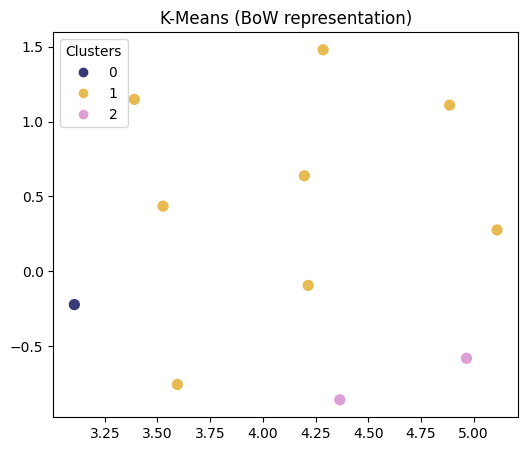

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


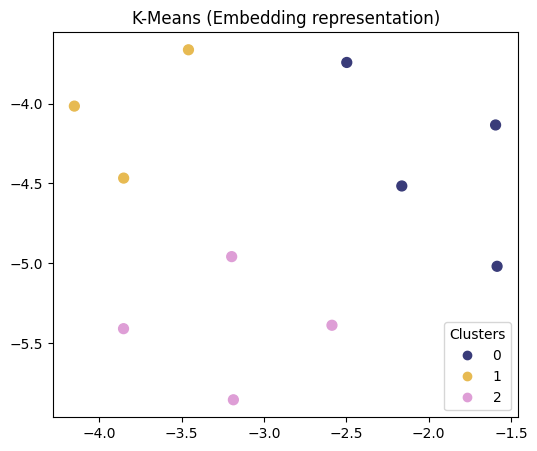

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


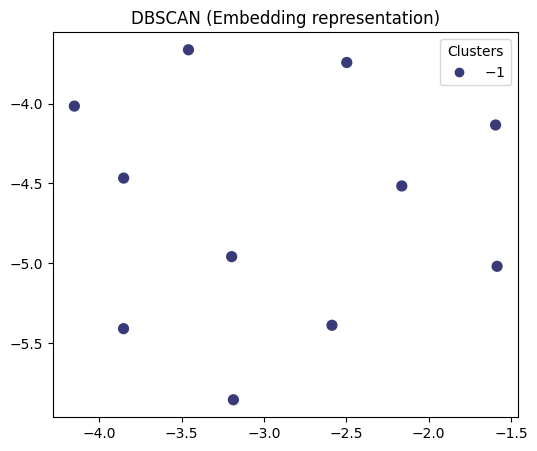

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.12/dist-packages/umap/umap_.py:2462: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


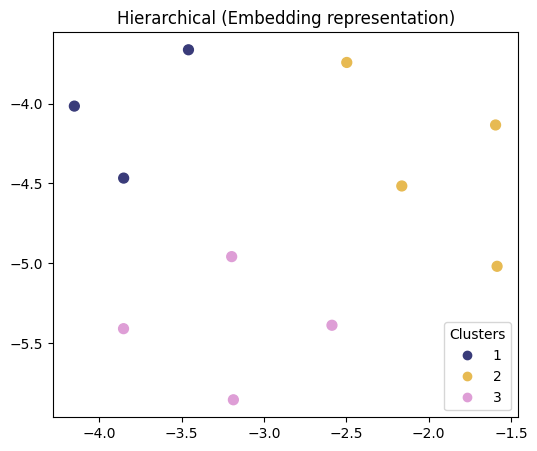

In [23]:
plot_umap_clusters(bow_sents, kmeans_bow_labels, title="K-Means (BoW representation)")


plot_umap_clusters(emb_sents, kmeans.labels_, title="K-Means (Embedding representation)")

plot_umap_clusters(emb_sents, dbscan_emb_labels, title="DBSCAN (Embedding representation)")


plot_umap_clusters(emb_sents, hier_emb_labels, title="Hierarchical (Embedding representation)")

<!-- END QUESTION -->

<br><br><br><br>

## Exercise 2: [Food.com](https://www.food.com/) recipes
<hr>

Now that we have applied document clustering on a toy corpus, let's move to a more realistic corpus.

In the lecture, we worked on an activity of manually clustering food items and discussed challenges associated with it. We also applied different clustering algorithms to cluster food images. We'll continue this theme of clustering food items in this lab. But instead of images we will cluster textual description of food items, i.e., recipe names.   

In this assignment, we will work with a sample of [Kaggle's Food.com recipes corpus](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions). This corpus contains 180K+ recipes and 700K+ recipe reviews. In this lab, we'll only focus on recipes and **not** on reviews. The recipes are present in `RAW_recipes.csv`. Our goal is to find categories or groupings of recipes from this corpus based on their names.

**Your tasks:**

- Download [`RAW_recipes.csv`](https://www.kaggle.com/shuyangli94/food-com-recipes-and-user-interactions?select=RAW_recipes.csv) and put it under the `data` directory in the homework folder.
- Run the code below. The dataset is quite large, and in this assignment, for speed, you will work with a sample of the dataset. The function `get_recipes_sample` below carries out some preliminary preprocessing and returns a sample of the recipes with most frequent tags.

> *Note: Depending upon the capacity of your computer, feel free to increase or decrease the size of this sample by changing the value for `n_tags`. If you decide to go with a different value of `n_tags`, state it clearly in Exercise 2.1 so that the grader knows about it.*

In [24]:
orig_recipes_df = pd.read_csv("RAW_recipes.csv")
orig_recipes_df.shape

(231637, 12)

In [25]:
def get_recipes_sample(orig_recipes_df, n_tags=300, min_len=5):
    orig_recipes_df = orig_recipes_df.dropna()  # Remove rows with NaNs.
    orig_recipes_df = orig_recipes_df.drop_duplicates(
        "name"
    )  # Remove rows with duplicate names.
    # Remove rows where recipe names are too short (< 5 characters).
    orig_recipes_df = orig_recipes_df[orig_recipes_df["name"].apply(len) >= min_len]
    # Only consider the rows where tags are one of the most frequent n tags.
    first_n = orig_recipes_df["tags"].value_counts()[0:n_tags].index.tolist()
    recipes_df = orig_recipes_df[orig_recipes_df["tags"].isin(first_n)]
    return recipes_df

In [26]:
recipes_df = get_recipes_sample(orig_recipes_df)
recipes_df.shape

(9100, 12)

In [27]:
recipes_df["name"]

,name
42,i yam what i yam muffins
101,to your health muffins
129,250 00 chocolate chip cookies
138,lplermagronen
163,california roll salad
...,...
231430,zucchini wheat germ cookies
231514,zucchini blueberry bread
231547,zucchini salsa burgers
231596,zuppa toscana


<br><br>

**In the rest of the homework, we will use `recipes_df` above, which is a subset of the original dataset.**

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.1 Longest and shorter recipe names
rubric={points:2}

**Your tasks:**

1. Print the shortest and longest recipe names (length in terms of number of characters) from `recipes_df`. If there is more than one recipe with the same shortest/longest length, store **one** of them in `shortest_recipe` and/or `longest_recipe` as a **string**.

</div>

<div class="alert alert-warning">

Solution_2.1
    
</div>

_Points:_ 2

In [28]:
shortest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmin(), 'name']
longest_recipe = recipes_df.loc[recipes_df['name'].str.len().idxmax(), 'name']

print('shortest recipe name:', shortest_recipe)
print('longest recipe name:', longest_recipe)

shortest recipe name: bread
longest recipe name: baked tomatoes with a parmesan cheese crust and balsamic drizzle


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 2.2 More EDA
rubric={points:2}

**Your tasks:**
1. Create a word cloud for the recipe names. You can use [the `wordcloud` package](https://github.com/amueller/word_cloud) for this, which you will have to install in the course environment.
```
> conda activate cpsc330
> conda install -c conda-forge wordcloud
```

</div>

<div class="alert alert-warning">

Solution_2.2
    
</div>

_Points:_ 2

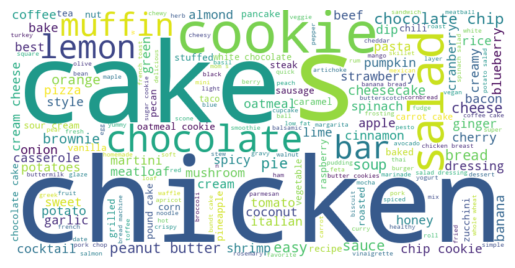

In [29]:
from wordcloud import WordCloud

text = " ".join(recipes_df["name"])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">

### 2.3 Representing recipe names
rubric={points:3}

The next step is creating a representation of recipe names.

**Your tasks:**

1. Similar to Exercise 1, create sentence embedding representation of recipe names (`name` column in `recipes_df`).  For the rest of the homework, we'll stick to the sentence embedding representation of recipe names.


> You might have to convert the recipe names to a list (`recipes_df["name"].tolist()`) for the embedder to work
> *If you create a dataframe with sentence embedding representation, set the index to `recipes_df.index` so that the indices match with the indices of the sample we are working with.*  
> **This might take a while to run.**

</div>

<div class="alert alert-warning">

Solution_2.3
    
</div>

_Points:_ 3

In [30]:
embeddings = embedder.encode(recipes_df["name"].tolist())
emb_sent_df = pd.DataFrame(embeddings, index=recipes_df.index)
emb_sent_df

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
42,0.019592,-0.088336,0.072677,-0.034575,-0.048741,-0.049801,0.175334,-0.055191,0.020301,0.019828,...,0.063293,-0.067171,0.087500,-0.061550,0.039297,-0.050147,0.027708,0.056843,0.056152,-0.122506
101,-0.000567,-0.011825,0.073199,0.058176,0.031688,-0.015428,0.168134,0.000466,0.033078,-0.013923,...,-0.012926,-0.015949,0.031315,-0.059074,0.014143,-0.047270,0.007844,0.035501,0.076061,-0.078119
129,-0.022604,0.065034,-0.033065,0.014450,-0.105039,-0.050559,0.100076,0.022929,-0.037398,0.011857,...,0.007971,-0.019165,0.004935,0.009005,0.000919,-0.040078,0.008650,-0.075781,-0.083477,-0.123240
138,-0.066915,0.025988,-0.087689,-0.006847,-0.012861,0.049035,0.035351,0.124966,-0.011697,-0.050179,...,-0.042345,-0.005794,-0.031800,0.120664,-0.057335,-0.077068,0.001653,-0.048223,0.116455,0.021789
163,-0.007068,-0.007308,-0.026629,-0.004153,-0.052810,0.011126,0.024000,-0.036994,0.023526,-0.046870,...,-0.018432,0.051918,0.036101,-0.035312,0.005817,0.101802,-0.063171,-0.007917,0.089744,0.006997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231430,-0.036366,0.087173,-0.039641,0.002705,0.097142,-0.075385,0.068207,0.010435,-0.069214,0.010464,...,0.050988,-0.064541,0.090829,-0.004571,0.079109,0.019663,-0.058483,-0.048723,0.019152,-0.012266
231514,-0.052718,0.008980,-0.046014,0.030194,0.005201,0.009964,-0.006760,0.030238,-0.031474,0.024632,...,0.075467,0.000967,0.085033,-0.006520,0.031094,0.072901,-0.094975,-0.052466,-0.003300,-0.006991
231547,-0.080801,0.004295,-0.044325,0.038308,-0.030125,-0.063566,0.004788,0.004822,0.015525,-0.040094,...,0.066642,0.016605,0.096211,-0.023969,0.045752,0.017091,-0.062939,-0.016950,0.012060,0.039776
231596,-0.060801,0.111672,-0.108755,0.052323,-0.099851,-0.027532,0.084190,-0.004861,0.002891,0.013943,...,0.038082,-0.014214,0.048392,0.050377,0.015281,0.106766,0.032009,0.020113,0.004977,-0.005828


<!-- END QUESTION -->

<br><br><br><br>

## Exercise 3: Clustering recipe names
<hr>

In this exercise you'll cluster recipe names with some of the clustering algorithms we have seen in class. This will also involve making some attempts to pick reasonable hyperparameter values for each clustering method based on the quality of the resulting clusters. For example, for KMeans, you need to specify the number of clusters in advance, which is often challenging on real-world datasets. For DBSCAN, you need to pick appropriate `eps` and `min_samples`. For hierarchical clustering, you need to pick a suitable linkage criterion, distance metric, and prune the tree so that it's possible to visualize and interpret it.

Here are some methods which may help you with picking reasonable values for the hyperparameters.
- Visualize the Elbow plot (KMeans).
- Visualize Silhouette plots.
- Visualize resulting clusters using `plot_umap_clusters` function from Exercise 1.
- Sample some recipes from each cluster, manually inspect whether there are coherent semantic themes. (For this, you may use the function `print_clusters` given below.)
        
> You may use the [`yellowbrick`](https://www.scikit-yb.org/en/latest/) package for visualizing the Elbow plot and the Silhouette plots. You can intall it with

```conda install -c districtdatalabs yellowbrick```

**Note that the process of picking reasonable hyperparameter values will be exploratory, iterative, and will involve manual inspection and judgment, as there is no ground truth to verify how well the model is doing. In your solutions, please do not include everything you try. Only present the results of the most informative trials. Add a narrative to your answer so that it's easy for the grader to follow your choices and reasoning.**

In [31]:
def print_clusters(recipes_df, cluster_labels, n_recipes=10, replace=False, random_state=None):
    """
    Given recipes_df containing recipe names and cluster assignment (labels),
    sample and print n_recipes recipes per cluster.

    Parameters
    -----------
    recipe_df : pandas dataframe
        recipes dataframe containing recipe names in the "name" column
    cluster_labels : ndarray or a list
        cluster labels for each row in recipes_df
    n_recipes : int
        number of examples to sample from each cluster
    replace: bool
        replace flag to pass to the sampling of recipe names

    Returns
    -----------
    None
    """

    grouped = (
        pd.DataFrame(
            {
                "name": recipes_df["name"],
                "cluster_label": cluster_labels,
            }
        )
        .sort_values("cluster_label")
        .groupby("cluster_label")
    )

    for name, group in grouped:
        print(f"Cluster {name}")
        print(("----------").format(""))
        print("\n".join(group.sample(n_recipes, random_state=random_state, replace=replace)['name'].tolist()))
        print("\n\n")

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.1 K-Means
rubric={points:6}

**Your tasks:**

1. Cluster recipe titles using KMeans. Make some attempts to determine the optimal number of clusters.
2. Pick one or two best models and justify your choice.

</div>

<div class="alert alert-warning">

Solution_3.1
    
</div>

_Points:_ 6

* First we make the elbow method plot as well as a plot of the value of Silhouette score for a number of k values. This will give us and overview of how the different values of k might group the data and have an idea of where are the best performing ones.

* The results show that **10** is a value with a particularly high Silhouette score and also is the point of inflexion in the elbow plot. Because of this, **10** seems appropiate for the value of k to choose.

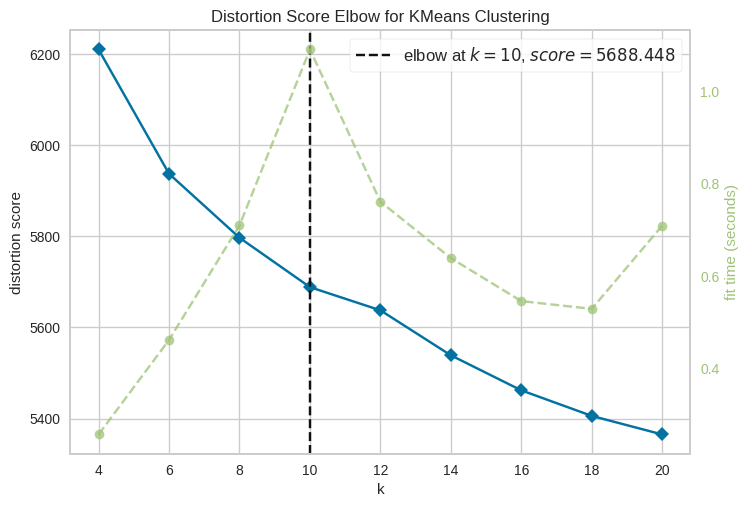

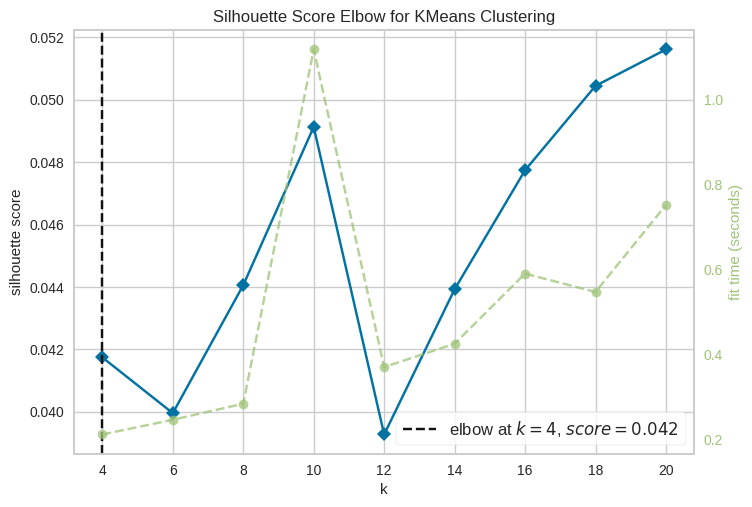

[np.int64(20), np.int64(18)]

In [32]:
from yellowbrick.cluster import KElbowVisualizer

X = emb_sent_df.values
# we try kmeans for several ks
ks = [4,6,8,10,12,14,16,18,20]

model = KMeans(n_init="auto", random_state=42)

viz_elbow = KElbowVisualizer(model, k=ks, metric="distortion")
viz_elbow.fit(X); viz_elbow.show()

viz_sil = KElbowVisualizer(model, k=ks, metric="silhouette")
viz_sil.fit(X); viz_sil.show()

scores = np.array(viz_sil.k_scores_)
kvals = np.array(viz_sil.k_values_)
best_idx = np.argsort(scores)[-2:][::-1]
best_ks = list(kvals[best_idx])
best_ks

We train a fresh model with k=10 and print some cluster labels, we will keep a random_state of 42 for reproducibility:

In [33]:
X = emb_sent_df.values
k = 10
km = KMeans(n_clusters=k, n_init="auto", random_state=42).fit(X)
labels = km.labels_

print_clusters(recipes_df, km.labels_, n_recipes=10, random_state=42)

Cluster 0
----------
peach scones
el ritual
japanese slipper
cuervo caribbean mist
caesar  believe it or not it s canadian
t g i  friday s one hour in the candy store
saketini
mock filet mignon
james  s blackberry cowboy
dobosh torta from hungary



Cluster 1
----------
cinnamon roll cream pie
nearly no fat fudge brownies
cheater s new york style cheesecake
chocolate brownie bites
hot pepper jelly turnovers
pumpkin cheesecake cpk
vanilla bean sweet butter
chocolate candy bar dessert
fudgy brownie pie
malted milk ball cupcakes



Cluster 2
----------
pioneer woman mexican macaroni salad
spinach salad with candied pears  pecans and brie
traditional caesar salad
spinach salad with blood orange raspberry vinaigr
spinach salad with orange vinaigrette
basic lemon salad dressing
raspberry maple green salad
crunchy mexicorn salad
pomegranate pear salad
cold tomato   cheese salad



Cluster 3
----------
meatloaf muffins with bbq sauce
mincemeat stuffed pork chops
my favorite thai red shrimp cur

We can see the clusters have semantically similar labels because recipe titles within each group share themes, such as cakes, cookies, salads, chicken dishes, or cocktails, indicating that the embeddings capture meaningful culinary semantics and that KMeans successfully grouped recipes by related food types. Cluster 6 is a good example of this, where all of the examples have the word cake.

Silhouette (cosine) k=10: 0.0895


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


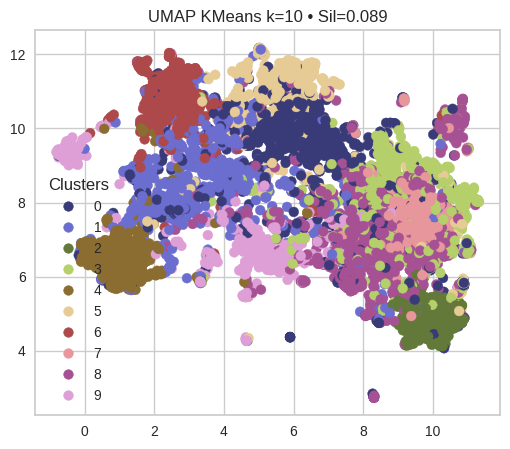

In [34]:
from sklearn.metrics import silhouette_score

sil = silhouette_score(X, labels, metric="cosine")
print(f"Silhouette (cosine) k={k}: {sil:.4f}")

plot_umap_clusters(
    X, labels,
    raw_texts=recipes_df["name"].tolist(),
    show_labels=False,
    title=f"UMAP KMeans k={k} • Sil={sil:.3f}"
)

The silhouette score of **0.0895** is relatively low, which reflects a high overlap typical in text embeddings. However, compared to other tested values of k, this score is among the highest, indicating relatively better separation. For this reason, we select this model with k=10 as the most appropriate model.



<!-- END QUESTION -->

<br><br><br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.2 DBSCAN
rubric={points:6}

**Your tasks:**

1. Cluster recipe names using `DBSCAN` with `metric="cosine"`. Make some attempts to tune the  hyperparameters `eps` and `min_samples`.

</div>

<div class="alert alert-warning">

Solution_3.2
    
</div>

_Points:_ 6

We will try several combinations of eps and min_samples, and compute the Silhouette score. After that, we will visualize and manually inspect the two best models based on this metric. That will give us and idea of how DBSCAN performs on this dataset.

In [35]:
from sklearn.cluster import DBSCAN

X = emb_sent_df.values

eps_list = [0.2, 0.25, 0.3, 0.35, 0.4, 0.5]
ms_list = [3, 5, 8, 10, 15]

results = []
for eps in eps_list:
    for ms in ms_list:
        db = DBSCAN(eps=eps, min_samples=ms, metric="cosine", n_jobs=1).fit(X)
        lbl = db.labels_
        mask = lbl != -1
        if mask.sum() > 1 and len(set(lbl[mask])) > 1:
            sil = silhouette_score(X[mask], lbl[mask])
        else:
            sil = -1
        ncl = len(set(lbl)) - (1 if -1 in lbl else 0)
        results.append((sil, ncl, eps, ms, lbl))

results.sort(reverse=True, key=lambda t: t[0])

for i, (sil, ncl, eps, ms, lbl) in enumerate(results, 1):
    print(f"Model {i}: eps={eps}, min_samples={ms}, clusters={ncl}, silhouette(noise-removed)={sil:.4f}")

Model 1: eps=0.2, min_samples=15, clusters=6, silhouette(noise-removed)=0.1954
Model 2: eps=0.2, min_samples=10, clusters=12, silhouette(noise-removed)=0.1300
Model 3: eps=0.5, min_samples=3, clusters=2, silhouette(noise-removed)=0.0666
Model 4: eps=0.25, min_samples=15, clusters=9, silhouette(noise-removed)=0.0547
Model 5: eps=0.4, min_samples=5, clusters=3, silhouette(noise-removed)=0.0502
Model 6: eps=0.2, min_samples=8, clusters=23, silhouette(noise-removed)=0.0256
Model 7: eps=0.35, min_samples=8, clusters=2, silhouette(noise-removed)=0.0185
Model 8: eps=0.4, min_samples=8, clusters=2, silhouette(noise-removed)=0.0169
Model 9: eps=0.2, min_samples=3, clusters=213, silhouette(noise-removed)=0.0146
Model 10: eps=0.2, min_samples=5, clusters=70, silhouette(noise-removed)=0.0112
Model 11: eps=0.35, min_samples=15, clusters=3, silhouette(noise-removed)=0.0053
Model 12: eps=0.25, min_samples=10, clusters=21, silhouette(noise-removed)=-0.0144
Model 13: eps=0.35, min_samples=10, clusters=

We can see that none of the models perform very well in terms of the Silhouette metric. The two best ones make 6 and 12 clusters, both with `eps` of 0.2 and `min_samples` of 15 and 10 respectively. We visualize these clusters with umap as well as print them with some of their samples:

Model 1: eps=0.2, min_samples=15, clusters=6, silhouette(noise-removed)=0.1954


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


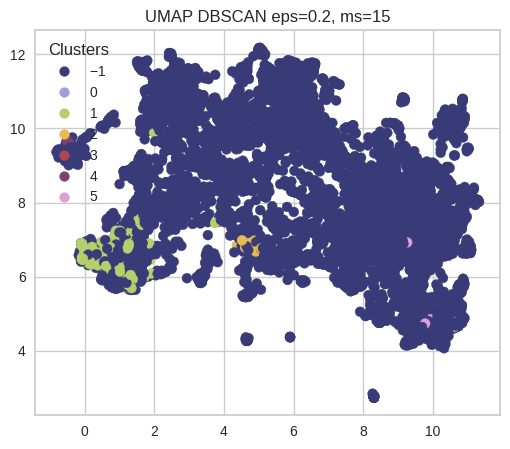

Cluster -1
----------
immunity building miso soup
peanut thai dressing
chicken noodle salad
cocoa cream pie
baked hot dogs
bread machine apple chunk bread
old fashioned linzer torte
sonny s steak hoagies



Cluster 0
----------
chef salad  dressing
ranch salad dressing
homemade salad dressing
spiced garden salad dressing
family favorite salad dressing
my best salad dressing
homemade salad dressing
almond salad dressing



Cluster 1
----------
coconut chocolate chip cookies
lower fat peanut butter oatmeal cookies
pudding oatmeal cookies
dark chocolate and butterscotch oatmeal cookies
easy pumpkin cookies
cherry chocolate cookies
coconut chocolate chip cookies
cinnamon honey oat drop cookies



Cluster 2
----------
cardamom banana bread
pineapple banana loaf
vanilla banana bread
banana bread latte
insane banana nut bread
cardamom banana bread
double chocolate banana bread
mocha banana bread



Cluster 3
----------
banana snack cake
banana cake made simple
banana cinnamon bundt cake
easy 

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


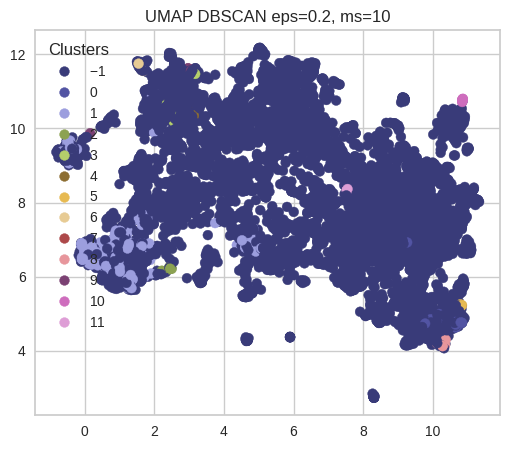

Cluster -1
----------
isis wicked ginger rum cocktail
penne with chicken and spinach and mushroom
chocolate chip zucchini cake
citrus chicken with vegetables
bacon cornbread
blueberry  lemon   white chocolate quick bread
nutella lava cookies
chai buttermilk spice cake



Cluster 0
----------
strawberry and spinach salad with balsamic vinaigrette
spiced garden salad dressing
sweet spinach salad
sharon s spinach strawberry salad
spinach salad with blood orange raspberry vinaigr
baby spinach salad with mandarin orange and red onions
kiwi strawberry spinach salad
strawberry and spinach salad with balsamic vinaigrette



Cluster 1
----------
cinnamon chip oatmeal cookies
peanut butter cookies   the magnolia bakery
milk chocolate almond cookies
maple walnut white chocolate chip cookies
cream cheese and chocolate muffin cakes
chunky chocolate cookies
banana oatmeal chocolate chip cookies
raspberry chocolate chip cookies



Cluster 2
----------
chocolate snickerdoodles
apple snickerdoodles
sni

In [36]:
top = results[:2]

for i, (sil, ncl, eps, ms, lbl) in enumerate(top, 1):
    print(f"Model {i}: eps={eps}, min_samples={ms}, clusters={ncl}, silhouette(noise-removed)={sil:.4f}")
    plot_umap_clusters(X, lbl, raw_texts=recipes_df['name'].tolist(), show_labels=False,
                        title=f"UMAP DBSCAN eps={eps}, ms={ms}")
    print_clusters(recipes_df, lbl, n_recipes=8, replace=True, random_state=42)

Looking at the results printed by `print_clusters` there is semantic similarity in the values of the resulting clusters. For the model with 6 clusters, cluster 4 shares the word "muffins".

We will keep the first model, since it is the best-performing and gives decently good clusters in terms of semantic similarity.

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.3 Hierarchical clustering
rubric={points:6}

**Your tasks:**

1. Try hierarchical clustering with `metric="cosine"` on this problem. Show a dendrogram by using a suitable truncation method.
2. Create flat clusters by cutting the tree at the appropriate level.

> *Note: Try orientation="left" of `dendrogram` for better readability of the dendrogram.*

</div>

<div class="alert alert-warning">

Solution_3.3
    
</div>

_Points:_ 6

We will experiment with average and complete as linkage methods. Also we will try several values of k and compute Silhouette score. We will truncate at 30 clusters for better visualization.

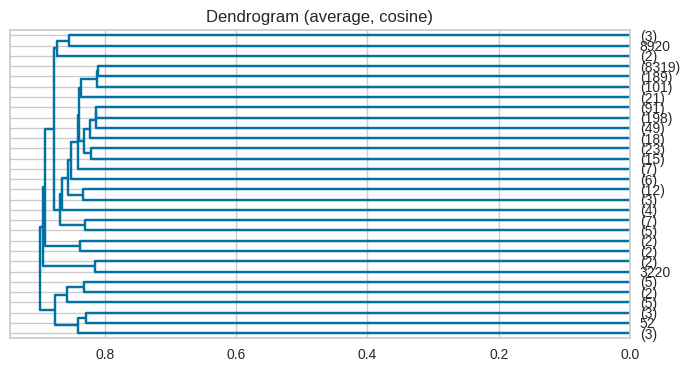

best: method=average, k=6, silhouette=0.1120


/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


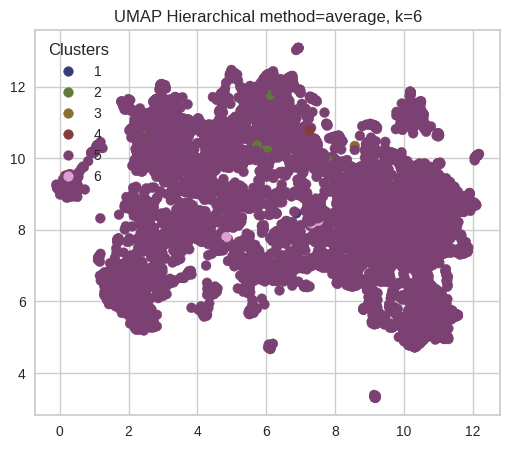

Cluster 1
----------
all american club
220 btu
american country fare
all american club
2000 flushes
american country fare
american country fare
all american club



Cluster 2
----------
illusion
mob witnesses
el ritual
latin connection
the undercurrent
illusion
absolut trouble
caesar  believe it or not it s canadian



Cluster 3
----------
the next best thing to brad pitt
essential boy bribes
the next best thing to brad pitt
the next best thing to brad pitt
essential boy bribes
essential boy bribes
the next best thing to brad pitt
hemingway special



Cluster 4
----------
flash lightning
java chip frappuccino
time capsule
flash lightning
flash lightning
java chip frappuccino
time capsule
time capsule



Cluster 5
----------
golden peanut butter bars
peppermint crunch cookies
chicken stir fry with ginger peanut sauce
chocolate cherry rye cake with cherry chip mocha glaze
avocado chicken melt
bloated bag of monkey spunk
orange pots de creme
sourdough apple crumble cake



Cluster 6
-----

In [37]:
from sklearn.preprocessing import normalize
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# we will use normalize since it works better for cosine similarity
X = normalize(emb_sent_df.values)

Z_avg = linkage(pdist(X, metric="cosine"), method="average")
plt.figure(figsize=(8,4)); dendrogram(Z_avg, truncate_mode="lastp", p=30, show_contracted=True, orientation="left"); plt.title("Dendrogram (average, cosine)"); plt.show()

methods = ["average","complete"]
k_list = [6,8,10,12,14]
best = None
for m in methods:
    Z = linkage(pdist(X, metric="cosine"), method=m)
    for k in k_list:
        lbl = fcluster(Z, k, criterion="maxclust")
        sil = silhouette_score(X, lbl, metric="cosine")
        if (best is None) or (sil > best[0]):
            best = (sil, m, k, lbl)

sil, m, k, lbl = best
print(f"best: method={m}, k={k}, silhouette={sil:.4f}")

plot_umap_clusters(X, lbl, raw_texts=recipes_df["name"].tolist(), show_labels=False,
                   title=f"UMAP Hierarchical method={m}, k={k}")
print_clusters(recipes_df, lbl, n_recipes=8, replace=True, random_state=42)

<!-- END QUESTION -->

<br><br>

We get 6 clusters, with a Silouhette score of 0.1120. One of this clusters is very dominant, containing most of the datapoints. These results are very similar to what we obtained with DBSCAN. Because these are the best results, we will keep this model as our chosen one.

<!-- BEGIN QUESTION -->

<div class="alert alert-info">
    
### 3.4 Manual interpretation of clusters
rubric={points:6}

**Your tasks:**

1. Label the topics/themes you see in the clusters created by different clustering methods.  
2. Do you see a common theme across clusters created by different clustering methods? Do you see any differences between the clusters created by different clustering methods?

</div>

<div class="alert alert-warning">

Solution_3.4
    
</div>

_Points:_ 6

1. For the clusters obtained with each method we will give the following labels based on their semantic similarity:

KMeans (k = 10)

- Cluster 0: Drinks and international desserts

- Cluster 1: Brownies, cheesecakes, and rich sweets

- Cluster 2: Salads and dressings

- Cluster 3: Savory mains (meat, pasta, seafood)

- Cluster 4: Cookies and biscuits

- Cluster 5: Cocktails and sweet beverages

- Cluster 6: Cakes and frosted desserts

- Cluster 7: Chicken dishes

- Cluster 8: Soups, casseroles, and savory sides

- Cluster 9: Breads, muffins, and breakfast items

DBSCAN (eps = 0.2, min_samples = 15)

- Cluster -1: Miscellaneous or noisy recipes

- Cluster 0: Salad dressings

- Cluster 1: Cookies

- Cluster 2: Banana breads

- Cluster 3: Banana cakes

- Cluster 4: Muffins

- Cluster 5: Spinach salads

Hierarchical (cosine, average, k = 6)

- Cluster 1: American-style dishes

- Cluster 2: Cocktails and mixed drinks

- Cluster 3: Desserts and themed recipes

- Cluster 4: Drinks and frappuccino-style items

- Cluster 5: Mixed desserts and savory fusions

- Cluster 6: Appetizers and homemade basics

2. All methods reveal recipe themes tied to dish type or ingredient. KMeans produces the most balanced and interpretable clusters. DBSCAN isolates highly specific patterns while ignoring noise. Hierarchical clustering shows weaker separation and some mixing, highlighting how linkage choices can affect cluster coherence.

<!-- END QUESTION -->

<br><br><br><br>

Before submitting your assignment, please make sure you have followed all the instructions in the Submission Instructions section at the top.

Here is a quick checklist before submitting:

- [ ] Restart kernel, clear outputs, and run all cells from top to bottom.  
- [ ] `.ipynb` file runs without errors and contains all outputs.  
- [ ] Only `.ipynb` and required output files are uploaded (no extra files).  
- [ ] Execution numbers start at **1** and are in order.  
- [ ] If `.ipynb` is too large and doesn't render on Gradescope, also upload a PDF/HTML version.  
- [ ] Reviewed the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2025W1/docs/homework_instructions.html).  

![](img/eva-well-done.png)